<a href="https://colab.research.google.com/github/DrBooma/Regression/blob/main/Linear_Regression_sample_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Models Regression**

---


Linear models are a good choice when the target value is expected to be a linear combination of the features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [ ]:
#Load dataset
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ODL/diabetes.csv')
# column headings
#columns = ['age', 'sex', 'bmi', 'average_bp', 's1', 's2', 's3', 's4', 's5', 's6']
# load regression dataset
#diabetes, target = load_diabetes(return_X_y=True)
#diabetes = pd.DataFrame(data=diabetes, columns=columns)
print(diabetes.shape)
diabetes.head()

(303, 13)


,age,gender,cp,bp,chol,fbs,ecg,ex,dep,ca,thal,maxhr,disease
0,63,1,3,145,233,1,0,0,2.3,0,1,150,1
1,37,1,2,130,250,0,1,0,3.5,0,2,187,1
2,41,0,1,130,204,0,0,0,1.4,0,2,172,1
3,56,1,1,120,236,0,1,0,0.8,0,2,178,1
4,57,0,0,120,354,0,1,1,0.6,0,2,163,1


In [ ]:
#Data Summary
diabetes.describe()

,age,gender,cp,bp,chol,fbs,ecg,ex,dep,ca,thal,maxhr,disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,0.326733,1.039604,0.729373,2.320132,149.646865,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,0.469794,1.161075,1.022606,0.592299,22.905161,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,71.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,133.500000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,0.000000,0.800000,0.000000,2.000000,153.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,1.000000,1.600000,1.000000,3.000000,166.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,1.000000,6.200000,4.000000,3.000000,202.000000,1.000000


**Correlation Analysis**

---

**Method 1**

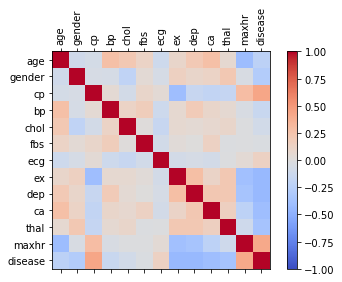

In [ ]:

corr = diabetes.corr()
#corr
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(diabetes.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(diabetes.columns)
ax.set_yticklabels(diabetes.columns)
plt.show()

**Method 2**

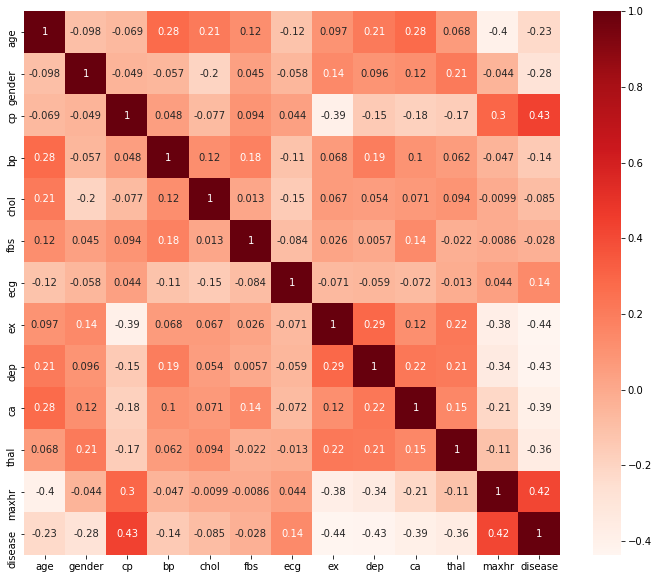

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor1 = diabetes.corr()
sns.heatmap(cor1, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(corr["disease"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

cp         0.433798
ex         0.436757
dep        0.430696
maxhr      0.421741
disease    1.000000
Name: disease, dtype: float64

In [ ]:
print(diabetes.groupby('disease').size())

disease
0    138
1    165
dtype: int64


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   gender   303 non-null    int64  
 2   cp       303 non-null    int64  
 3   bp       303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   ecg      303 non-null    int64  
 7   ex       303 non-null    int64  
 8   dep      303 non-null    float64
 9   ca       303 non-null    int64  
 10  thal     303 non-null    int64  
 11  maxhr    303 non-null    int64  
 12  disease  303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [ ]:
# Prepare data for modeling
# Separate input features and target
#y = target
#X = diabetes

#Seperating dependent and independent variables. 

X = diabetes.iloc[:, [2]].values
y = diabetes.iloc[:, 12].values

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

In [ ]:
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

**Linear Regression (Ordinary Least Squares)**

Linear Regression fits a model to minimize the residual sum of squares between observed and predicted targets.

In [ ]:
from sklearn.linear_model import LinearRegression

# Train model
lr = LinearRegression().fit(X_train, y_train)

# get cross val scores
get_cv_scores(lr)

CV Mean:  0.07459324960403431
STD:  0.161769942790835




In [ ]:
print('Train Score: ', lr.score(X_train, y_train))
print('Test Score: ', lr.score(X_test, y_test))

Train Score:  0.1478956605985141
Test Score:  0.2712744557039525


In [ ]:
# coef_ attribute is numpy array with one entry per input feature
print("LR Coefficient : " , lr.coef_)

# intercept_ always a single floating point number
print("LR Intercept : ",lr.intercept_)

LR Coefficient :  [0.18340379]
LR Intercept :  0.36117067990114976


In [ ]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R square:',r2_score(y_test, y_pred))

Mean Absolute Error: 0.39781530480629784
Mean Squared Error: 0.18110338970671
Root Mean Squared Error: 0.42556243925740206
R square: 0.2712744557039525


# **Logistic Regression**

---
Best Fit Model for the dataset


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.741
Test set score: 0.802


# **Decision Tree**

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.741
Accuracy on test set: 0.802


# **Random Forest**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.741
Accuracy on test set: 0.802


# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.741
Accuracy on test set: 0.802


# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.74
Accuracy on test set: 0.80


# **Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.74
Accuracy on test set: 0.80
